In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#lets load the training dataset
train_set=pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Prediction/Google_Stock_Price_Train.csv')
train_set

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
#now lets retrieve the necessay columns which is our open
training_set=train_set.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
#we need to perform the feature scaling that too normalisation to make the numbers lie between 0 and 1
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
#now lets start our analyzation for that lets create two variables for xtrain and ytrain
"""
X-train usually takes the timesteps i.e. we gonna take the open or stock prices values for three months i.e. going to separate the entire 1258
data rows into months of three and y train contains the values of last day of the third month.
For this we need to create a datastructure for the timesteps
"""
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

x_train,y_train=np.array(x_train), np.array(y_train)
x_train


array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [ ]:
x_train.shape

(1198, 60)

In [ ]:
#in order to work with LSTM the input should be a 3d array as third one is for slacked LSTM i.e. for memory purposes
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1198, 60, 1)

## Build the RNN

In [ ]:
#import necessary packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
#initialising the RNN
regressor=Sequential()

In [ ]:
#now the next step is to set up the first LSTM layer
"""
here in the lstm three important parameters are there:

1.units
2.return_sequences which need to be always true for the stacked LSTM systems (False by default)
3. input shape
"""
regressor.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
#now need to add dropouts which used to regularize the neurons by dropping them with the fixed rate
regressor.add(Dropout(0.2))

In [ ]:
#now lets add the second LSTM layer as since it is the second layer no need to provide the input shape
regressor.add(LSTM(units=50,return_sequences=True))
#add dropout
regressor.add(Dropout(0.2))

In [ ]:
#now lets add the third LSTM Layer
regressor.add(LSTM(units=50,return_sequences=True))
#add dropout
regressor.add(Dropout(0.2))

In [ ]:
#now lets add the fourth LSTM Layer which is the last one
regressor.add(LSTM(units=50)) #since it is the last layer return_sequence need to be false which is default
#add dropout
regressor.add(Dropout(0.2))

In [ ]:
#now lets add the output layer
regressor.add(Dense(units=1))

In [ ]:
#the next step is to choose the optimizers
#for RNN we can use RMSProp or adam
#compiling RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#training the RNN
regressor.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 [==============================] - 14s 107ms/step - loss: 0.0519
Epoch 2/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0072
Epoch 3/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0040
Epoch 9/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0043
Epoch 13/100

In [ ]:
test_set=pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Prediction/Google_Stock_Price_Test.csv')
test_set

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
train_set

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
real_stock_price=test_set.iloc[:,1:2].values

In [ ]:
test_set

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
total_dataset=pd.concat((train_set['Open'],test_set['Open']),axis=0)

In [ ]:
total_dataset

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [ ]:
inputs=total_dataset[len(total_dataset)-len(test_set)-60:].values

In [ ]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [ ]:
len(inputs)

80

In [ ]:
inputs=inputs.reshape(-1,1)


In [ ]:
inputs=sc.transform(inputs)

In [ ]:
x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)

In [ ]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
#to predict
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [ ]:
predicted_stock_price

array([[792.04816],
       [789.8433 ],
       [788.90735],
       [789.2467 ],
       [791.498  ],
       [796.2217 ],
       [801.914  ],
       [806.22296],
       [808.5372 ],
       [809.1831 ],
       [808.81146],
       [807.9481 ],
       [807.03796],
       [806.6835 ],
       [806.9967 ],
       [809.82965],
       [815.28534],
       [822.4595 ],
       [828.53815],
       [829.17596]], dtype=float32)

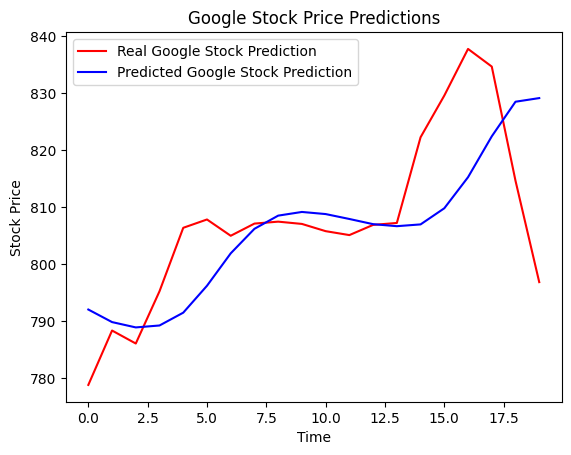

In [ ]:
#lets visualize the results
plt.plot(real_stock_price,color="red",label="Real Google Stock Prediction")
plt.plot(predicted_stock_price,color="blue", label="Predicted Google Stock Prediction")
plt.title('Google Stock Price Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()